In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. 데이터셋 로드
math_df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
por_df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-por.csv')

# 알코올 소비 데이터 (수준별 빈도 데이터)
alcohol_levels = {
    "low level": {"Frequency": 1054, "Percentage": 55.9},
    "hazardous level": {"Frequency": 679, "Percentage": 36.0},
    "harmful level": {"Frequency": 154, "Percentage": 8.2}
}

# 2. 수학 및 포르투갈어 데이터셋 병합
students_df = pd.concat([math_df, por_df], ignore_index=True)

# 3. 알코올 소비 수준 분류
def classify_alcohol_level(dalc, walc):
    avg_alcohol = (dalc + walc) / 2
    if avg_alcohol <= 2.0:
        return "low level"
    elif avg_alcohol <= 3.5:
        return "hazardous level"
    else:
        return "harmful level"

students_df['alcohol_level'] = students_df.apply(lambda x: classify_alcohol_level(x['Dalc'], x['Walc']), axis=1)

# 4. 범주형 변수 인코딩
label_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
label_encoder = LabelEncoder()

for col in label_columns:
    students_df[col] = label_encoder.fit_transform(students_df[col])

# 5. 수치형 변수 정규화
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
scaler = MinMaxScaler()

students_df[numerical_columns] = scaler.fit_transform(students_df[numerical_columns])

# 6. 특성과 타겟 설정
x = students_df.drop(columns=['G3', 'alcohol_level'])  # G3는 최종 성적, alcohol_level은 보조 정보
y = students_df['G3']  # 타겟 변수 (최종 성적)

# 7. 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 8. 딥러닝 모델 생성
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀 문제이므로 선형 활성화 함수 사용

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 9. 모델 학습
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 10. 모델 평가
loss, mae = model.evaluate(x_test, y_test)
print(f'테스트 세트에서의 평균 절대 오차 (MAE): {mae}')



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 91.4987 - mae: 8.9061 - val_loss: 16.7288 - val_mae: 3.1610
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1178 - mae: 3.4919 - val_loss: 17.2451 - val_mae: 3.2953
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9755 - mae: 3.2128 - val_loss: 14.4765 - val_mae: 2.7960
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.9278 - mae: 2.9836 - val_loss: 13.3271 - val_mae: 2.7151
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6844 - mae: 2.7429 - val_loss: 12.6418 - val_mae: 2.6595
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3350 - mae: 2.6796 - val_loss: 11.2581 - val_mae: 2.4370
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9632 - mae: 2.5903 - val_loss: 10.2724 - val_mae: 2.2875
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5993 - mae: 2.4997 - val_loss: 9.8300 - val_mae: 2.2781
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0861 - mae: 1.3740 - val_loss: 3.5485 - val_mae: 1.3470
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6184 - mae: 1.4447 - val_loss: 3.3117 - val_mae: 1.2429
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5070 - mae: 1.4059 - val_loss: 3.1298 - val_mae: 1.1542
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5676 - mae: 1.4113 - val_loss: 3.2145 - val_mae: 1.2009
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9314 - mae: 1.2736 - val_loss: 3.1058 - val_mae: 1.1829
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4038 - mae: 1.4101 - val_loss: 3.0316 - val_mae: 1.1157
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1023 - mae: 1.3666 - val_loss: 3.6129 - val_mae: 1.4120
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1425 - mae: 1.3502 - val_loss: 2.9365 - val_mae: 1.1203
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1495 - mae: 

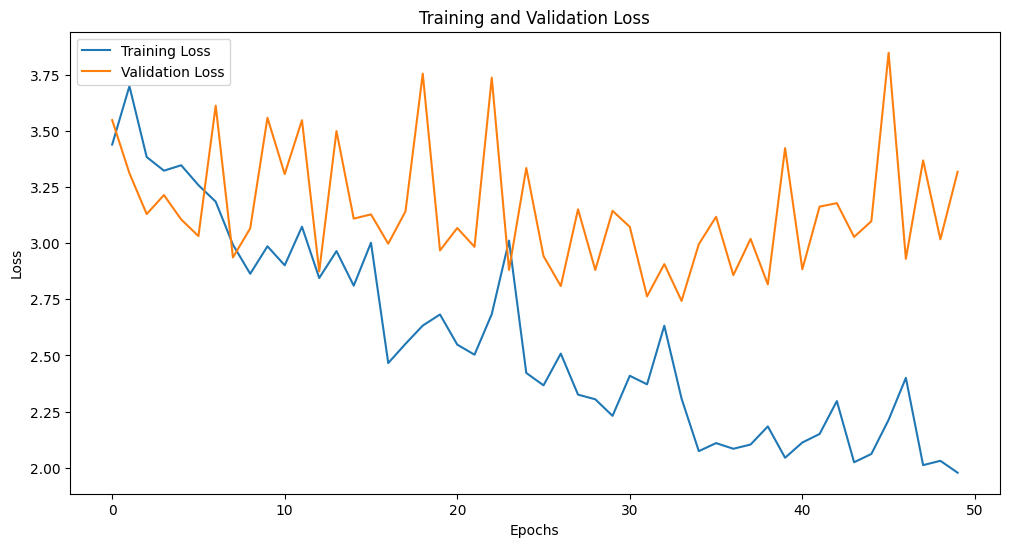

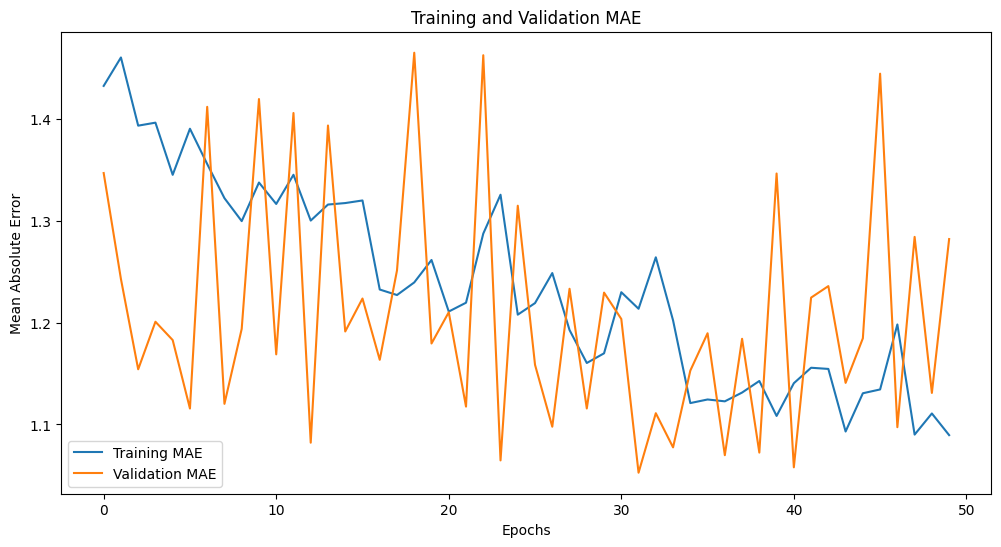

In [3]:
# 학습 과정 시각화
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 학습과 검증 손실 그래프
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 학습과 검증 MAE 그래프
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


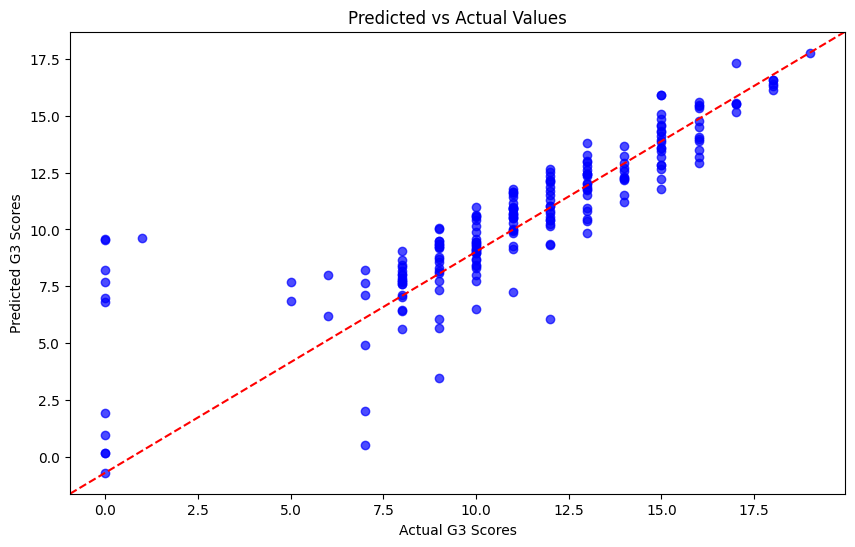

In [4]:
# 예측 값 계산
y_pred = model.predict(x_test)

# 실제 값과 예측 값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red', transform=plt.gca().transAxes)  # y=x 선
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual G3 Scores')
plt.ylabel('Predicted G3 Scores')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


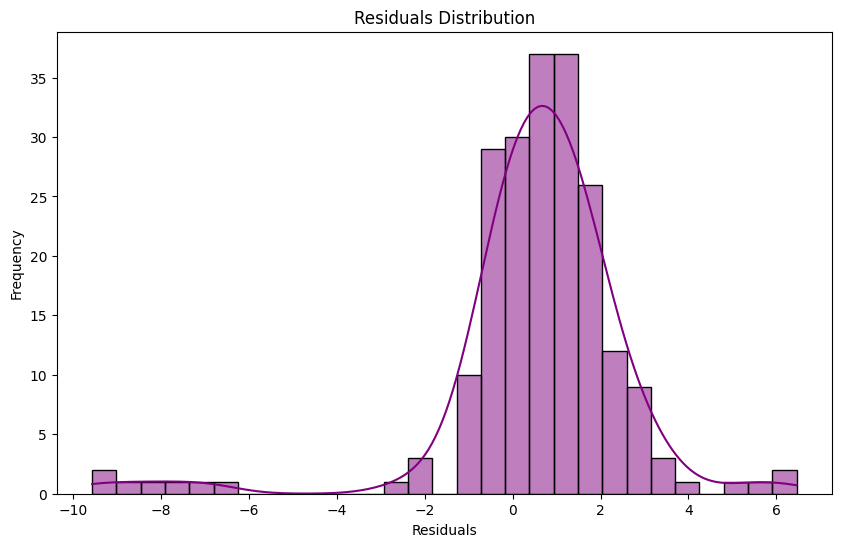

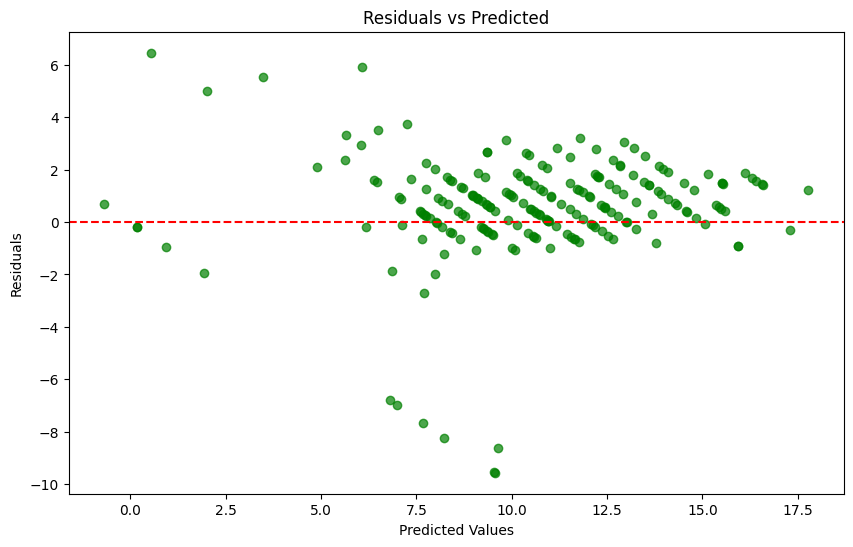

In [5]:
# 잔차 계산
residuals = y_test - y_pred.flatten()

# 히스토그램으로 잔차 분석
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 잔차 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


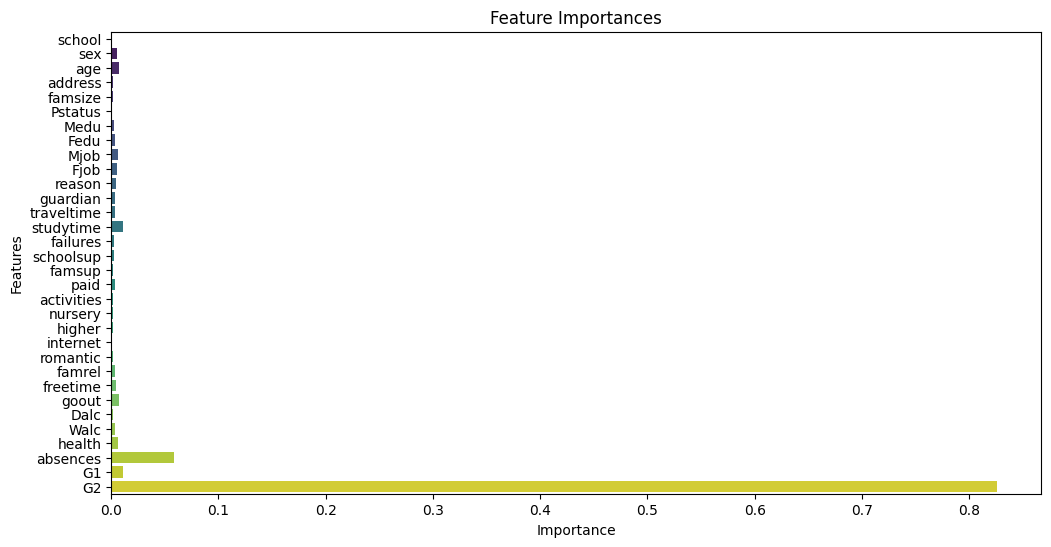

In [6]:
# 랜덤 포레스트로 특성 중요도 계산
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
importances = rf_model.feature_importances_

# 특성 중요도 시각화
features = x.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
